# Machine Learning Foundation Nanodegree

## Model Evaluation & Validation

## Project: Predicting Boston Housing Prices

Welcome to the final project of the Machine Learning Foundation Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import sklearn training and testing data splitter
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals_md as vs
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline
sns.set_style("whitegrid")

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# Minimum price of the data
minimum_price = prices.min()

# Maximum price of the data
maximum_price = prices.max()

# Mean price of the data
mean_price = prices.mean()

# Median price of the data
median_price = prices.median()

# Standard deviation of prices of the data
std_price = prices.std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165340.27765266784


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.

**Answer:**

- An increase in `'RM'` indicates more number or rooms or more space which increase the price i.e. `'MEDV'`. Hence `'LSTAT'` and `'MEDV'` are positively correlated.


- An increase in `'LSTAT'` indicates that more number of lower class owners live in the neighbourhood indicating cheaper/lower house prices i.e. `'MEDV'`. Hence `'LSTAT'` and `'MEDV'` are negatively correlated.


- An increase in `'PTRATIO'` indicates that there are more number students than teachers and the teachers will not be able to pay more attention to each of students thus lowering the quality of education which will decrease the price i.e. `'MEDV'`. Hence `'PTRATIO'` and `'MEDV'` are negatively correlated.


**Pearson's Coeffecient 'r' can be used to justify the above correlations:**
> r > 0 => Positive Correlation

> r = 0 => No Correlation

> r < 0 => Negative Correlation

In [3]:
data[["RM", "MEDV"]].corr(method="pearson")

,RM,MEDV
RM,1.000000,0.697209
MEDV,0.697209,1.000000


The Pearson's Coeffecient **r = 0.697 > 0**. This indicates positive correlation. Hence as `RM` increases `MEDV` increases.

In [4]:
data[["LSTAT", "MEDV"]].corr(method="pearson")

,LSTAT,MEDV
LSTAT,1.00000,-0.76067
MEDV,-0.76067,1.00000


The Pearson's Coeffecient **r = - 0.76 < 0**. This indicates negative correlation. Hence as `LSTAT` increases `MEDV` decreases.

In [5]:
data[["PTRATIO", "MEDV"]].corr(method="pearson")

,PTRATIO,MEDV
PTRATIO,1.000000,-0.519034
MEDV,-0.519034,1.000000


The Pearson's Coeffecient **r = - 0.519 < 0**. This indicates negative correlation. Hence as `'PTRATIO'` increases `'MEDV'` decreases.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable.

In [6]:
# Import 'r2_score'
from sklearn.metrics import r2_score


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [7]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

**Answer:**

R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. A value of 0 indicates that the model always fails to predict the target/actual value and a value of 1 indicates the model prefectly predicts the target value.

The model above has a high R2 score of **0.923** indicating that the dependent variable can be predicted from the independent variable and **92.3%** of the variance in the target variable can be captured by the model.

Hence I would consider this model to be successful in capturing the variation of the target variable

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [8]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Answer:**

By splitting our dataset into training and testing we can validate our model, i.e. measure the accuracy of our training model. 

If the entire dataset is used for training, our model will memorize the data and overfitting/under-generalization will occur and our model will not be able to guess answers with accuracy. 

If the entire dataset is used for testing, the model will not learn anything and underfitting/over-generalization will occur and again our model will not be able to guess answers with accuracy.

To overcome this we have to split our dataset into a suitable ratio of training and testing data and our model should not see the testing data at all untill the end. This optimizes of model for a good fit and high accuracy leaving the testing data for us to validate the accuracy of our model and avoid error caused by underfitting and overfitting.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

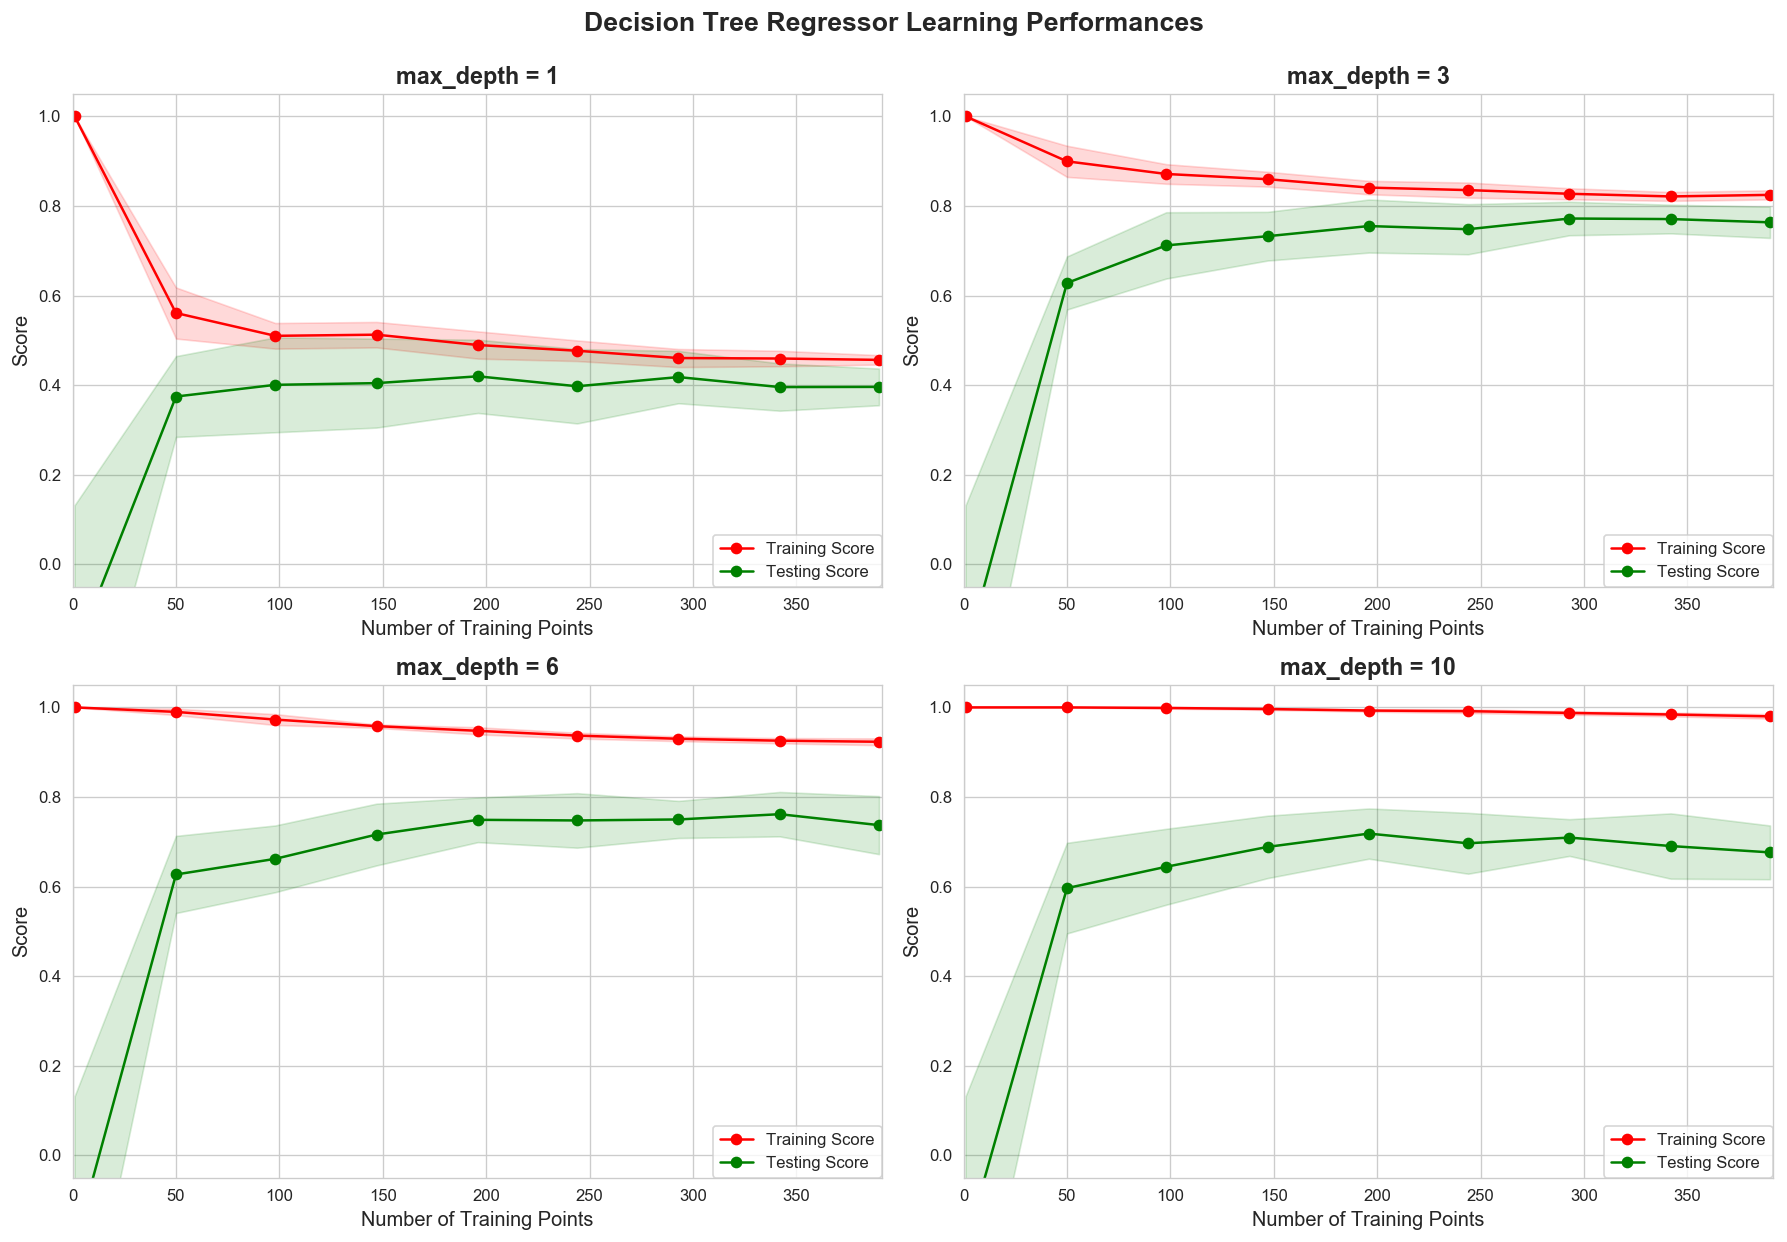

In [9]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Answer:**

- I would choose the graph with `max_depth=3`.


- As the number of training points are increased the training score and testing score are almost converging at around a score of 0.8. The variance  of the curve is decreasing and the testing score increases up until 300 data points and then levels off and becomes parallel to training curve.


- Since both training and testing curves have levelled off, providing more training points would not benefit the model.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

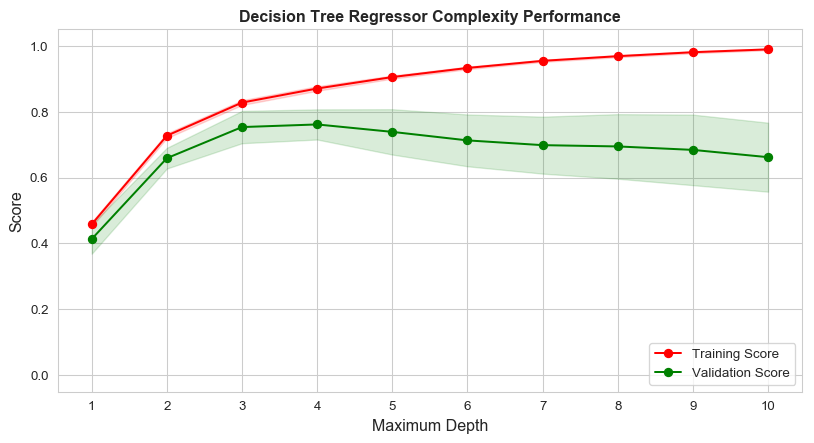

In [10]:
# Produce model complexity validation curve
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Answer:**

- When the model is trained with a maximum depth of 1 the model suffers from high bias and low variance i.e. underfitting. The model will not be complex enough and will be too generalized.


- When the model is trained with a maximum depth of 10 the model suffers from high variance and low bias i.e. overfitting. The model will memorize the data and cannot generalize enough.


- Justifications for the above conclusions can be given using the visual cues in the graph above. At `max_depth=1` the validation and training scores both are low. Low training scores indicate high bias. At `max_depth=10` the validation and training scores both diverge heavily and the training score increases to almost 1 and the validation score decreases indicating high variance.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

**Answer:**

- A maximum depth of 3 or 4 best generalizes the data.


- Based on the model complexity graph above, at `max_depth=3` the training score and the validation scores almost converge and are at the optimal value. After depth 4 they start to diverge and at depth 10 the training score is very high and validation score is very low indicating overfit.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

**Answer:**

Grid Search is a technique to tune the hyper-parameters and find the best optimized model.

If we have a set of models (which differ from each other in their parameter values, which lie on a grid), we then train each of the models and evaluate it using cross-validation. We then select the model with best cross-validation score.

For example, in our model to find the best maximum depth we can do a grid search with various maximum depths and then select the best optimized value for maximum depth.

<div style="text-align: center;">
    <table style="text-align: center; width: 25%">
        <caption style="text-align: center">Grid Search for DecisionTreeRegressor</caption>
        <tr style="text-align: center">
            <th style="text-align: center">Max-Depth</th>
            <th style="text-align: center">Score</th>
        </tr>
        <tr style="text-align: center">
            <th style="text-align: center">1</th>
            <td style="text-align: center">0.41</td>
        </tr>
        <tr style="text-align: center">
            <th style="text-align: center">2</th>
            <td style="text-align: center">0.66</td>
        </tr>
        <tr style="text-align: center">
            <th style="text-align: center">3</th>
            <td style="text-align: center">0.75</td>
        </tr>
        <tr style="text-align: center">
            <th style="text-align: center">4</th>
            <td style="text-align: center">0.76</td>
        </tr>
        <tr style="text-align: center">
            <th style="text-align: center">5</th>
            <td style="text-align: center">0.73</td>
        </tr>
        <tr style="text-align: center">
            <th style="text-align: center">6</th>
            <td style="text-align: center">0.72</td>
        </tr>
        <tr style="text-align: center">
            <th style="text-align: center">7</th>
            <td style="text-align: center">0.70</td>
        </tr>
        <tr style="text-align: center">
            <th style="text-align: center">8</th>
            <td style="text-align: center">0.68</td>
        </tr>
        <tr style="text-align: center">
            <th style="text-align: center">9</th>
            <td style="text-align: center">0.68</td>
        </tr>
        <tr style="text-align: center">
            <th style="text-align: center">10</th>
            <td style="text-align: center">0.66</td>
        </tr>
    </table>
</div>


In the table above, a maximum depth of 4 gives us the highest validation score. So we will select max_depth=4 for our model.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Answer:**

In `k-fold cross-validation`, the original sample is randomly partitioned into `k` equal sized sub-samples. 

Of the `k` sub-samples, 
- a single sub-sample is retained as the validation data for testing the model, and the remaining `k − 1` subsamples are used as training data. 
- The cross-validation process is then repeated `k` times, with each of the `k` subsamples used exactly once as the validation data. 
- The `k` results can then be averaged to produce a single estimation as the overall result of the model.

The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once and also it does not waste too much data which is a major advantage in problems where the number of samples is very small.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.

In [11]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


def fit_model(X, y):
    """ 
    Performs grid search over the 'max_depth' parameter for a 
    decision tree regressor trained on the input data [X, y].
    """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1, 11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor,
                        param_grid=params,
                        scoring =scoring_fnc,
                        cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    # Prepare the grid search table
    depths = [d['max_depth'] for d in grid.cv_results_["params"]]
    scores = grid.cv_results_["mean_test_score"]
    df = pd.DataFrame({"max_depth": depths, "mean_test_score": scores}, 
                      columns=["max_depth", "mean_test_score"])
        
    # Return the optimal model after fitting the data
    return grid.best_estimator_, df

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [12]:
from IPython.core.display import HTML

# Fit the training data to the model using grid search
reg, grid_table = fit_model(X_train, y_train)

# Display the grid search result table
display(HTML(grid_table.to_html(index=False)))

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

max_depth,mean_test_score
1,0.413184
2,0.658641
3,0.753116
4,0.763576
5,0.728286
6,0.709269
7,0.702148
8,0.691874
9,0.686645
10,0.668592


Parameter 'max_depth' is 4 for the optimal model.


**Answer:**

At a maximum depth of 4 the model is optimized.

This is not a surprising result compared to values (3 or 4) guessed using visual cues from the model-complexity graph in Q6. I would consider my guess to be pretty accurate.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

Run the code block below to have your optimized model make predictions for each client's home.

In [13]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer:**

**Client 1:**
- I would recommend as selling price of <span>&#36;</span>403,025. 
- Client 1 has a moderately big house in a moderately high poverty rate neighbourhood with a moderate student-to-teacher ratio. These features are moderate and the selling price will be closer to the mean selling price.
- The selling price <span>&#36;</span>403,025 is pretty close to the mean selling price of <span>&#36;</span>454,342 and is within 1 standard deviation from the mean selling price as seen in Data Exploration part.
- As we have seen in Q1 Feature Observation, size of the house is positively correlated to selling price and poverty rate and student-to-teacher ration is negatively correlated to selling price. So I think a selling price of <span>&#36;</span>403,025 is reasonable given the values for the respective features.

**Client 2:**
- I would recommend as selling price of <span>&#36;</span>237,478. 
- Client 2 has a small house in a high poverty rate neighbourhood with a hight student-to-teacher ratio. These features will bring down the selling price.
- The selling price <span>&#36;</span>237,478 is pretty close to the minimum selling price of <span>&#36;</span>105,000 as seen in Data Exploration part.
- As we have seen in Q1 Feature Observation, size of the house is positively correlated to selling price and poverty rate and student-to-teacher ration is negatively correlated to selling price. So I think a selling price of <span>&#36;</span>237,478 is reasonable given the values for the respective features.

**Client 3:**
- I would recommend as selling price of <span>&#36;</span>931,636. 
- Client 3 has a big house in a low poverty rate neighbourhood with a low student-to-teacher ratio. These features will increase the selling price to a high value.
- The selling price <span>&#36;</span>931,636 is pretty close to the maximum selling price of <span>&#36;</span>1,024,800 as seen in Data Exploration part.
- As we have seen in Q1 Feature Observation, size of the house is positively correlated to selling price and poverty rate and student-to-teacher ration is negatively correlated to selling price. So I think a selling price of <span>&#36;</span>931,636 is reasonable given the values for the respective features.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [14]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

Some questions:

- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer:**

The constructed model should not be used in a real-world setting. The reasons for this are:

- The model has been trained on data collected from 1978 and does not account for the inflation in prices. Hennce may not be relevant today (2018).


- The dataset covers only  small subset of features. Factors/features like swimming pool, area size of the backyard, the interior styling of the house, applicances in the house, proximity to essential services like schools, hospitals, supermarkets etc. will affect the price of a house and have not been factored in the model.


- The model appears to be too sensitive and not well generalized. As seen above, running the model multiple times for a specific client provides a wide range of variance in selling price. Hence the model is not robust enough to make consistent predictions in real-world.


- A model trained on data from Boston may not be applicable for a smaller/rural city as data or features relevant to a urban settings may not be relevant for a rural setting.


By training our model with more upto date data, accounting for inflation and including more features the robustness, accuracy and consistency of the model can be increased enough to be applied in real-world setting.

--------

<div style="text-align: right"><h3>- Maneesh</h3></div>